In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1)
X = data[:, 0:3]
y = data[:, 3:]
X = preprocessing.scale(X)

In [ ]:
# predict
def predict(x, W, b):
    return x @ W + b

### weights
W = tf.Variable(tf.random.normal((3, 1), dtype=tf.float64))
b = tf.Variable(tf.random.normal((1, 1), dtype=tf.float64))

### training
learning_rate = 0.1
num_epochs = 200

### loss function
loss = tf.keras.losses.MeanSquaredError()

losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X, W, b)
        
        # loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [W, b])
        
        # update
        W.assign_sub(learning_rate * dW) 
        b.assign_sub(learning_rate * db)

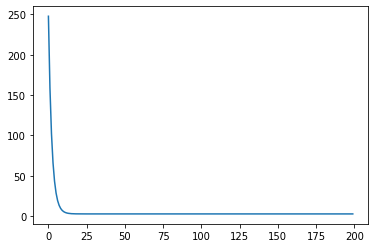

In [ ]:
plt.plot(losses)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_demo.csv', delimiter=',', skip_header=1)
X = data[:, 0:4]
y = data[:, 4:]
X = preprocessing.scale(X)

In [ ]:
# predict
def predict(x, W, b):
    return tf.keras.activations.sigmoid(x @ W + b)

### weights
W = tf.Variable(tf.random.normal((4, 1), dtype=tf.float64))
b = tf.Variable(tf.random.normal((1, 1), dtype=tf.float64))

### training
learning_rate = 0.1
num_epochs = 200

### loss function
loss = tf.keras.losses.BinaryCrossentropy()

losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X, W, b)
        
        # loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [W, b])
        
        # update
        W.assign_sub(learning_rate * dW) 
        b.assign_sub(learning_rate * db)

1.0


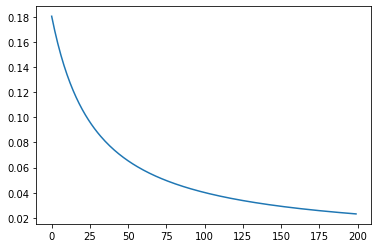

In [ ]:
preds = predict(X, W, b)

preds = preds.numpy()
preds = preds.round()

print((preds == y).mean())

plt.plot(losses)